In [82]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [83]:
dataset_path = 'datasets/'

In [84]:
# Carregando o dataset com labels inferidos dos nomes das pastas
batch_size = 32
img_height = 180
img_width = 180

In [85]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,     # 80% treino, 20% validação
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 21 files belonging to 3 classes.
Using 17 files for training.


In [86]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 21 files belonging to 3 classes.
Using 4 files for validation.


In [87]:
dataset = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    labels='inferred',               # Inferir o rótulo a partir do nome das pastas
    label_mode='int',                # Rótulos como inteiros (0, 1, 2)
    image_size=(180, 180),           # Redimensionar as imagens
    batch_size=32                    # Tamanho dos lotes
)

Found 21 files belonging to 3 classes.


In [88]:
# Nomes das classes
class_names = train_ds.class_names
print("Classes:", class_names)

Classes: ['cebola', 'pimentao', 'tomate']


In [89]:
# Melhorando performance com cache e prefetch
AUTOTUNE = tf.data.AUTOTUNE

In [90]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [91]:
# Normalização (converter pixels de 0-255 para 0-1)
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [92]:
# Aplicar a camada de normalização no pipeline
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))

In [93]:
# Criando um modelo simples de CNN
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(img_height, img_width, 3)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(len(class_names))  # Número de classes
])

In [103]:
# Compilar o modelo
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 180, 180, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 90, 90, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 90, 90, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 45, 45, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 45, 45, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │     3,965,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,989,027 (15.22 MB)

 Trainable params: 3,989,027 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

In [95]:
# Treinamento
epochs = 10
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.4706 - loss: 1.1023 - val_accuracy: 0.7500 - val_loss: 1.0330
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step - accuracy: 0.7647 - loss: 0.7426 - val_accuracy: 0.2500 - val_loss: 3.2391
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step - accuracy: 0.4706 - loss: 2.0836 - val_accuracy: 0.2500 - val_loss: 3.5181
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step - accuracy: 0.3529 - loss: 1.7819 - val_accuracy: 0.7500 - val_loss: 1.2626
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step - accuracy: 0.6471 - loss: 0.6505 - val_accuracy: 0.5000 - val_loss: 1.2678
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step - accuracy: 0.4706 - loss: 0.9636 - val_accuracy: 0.5000 - val_loss: 1.1211
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step - accuracy: 0.7059 - loss: 0.7001 - val_accuracy: 0.0000e+00 - val_loss: 1.1905
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step - accuracy: 0.8235 - loss: 0.5043 - val_accuracy: 0.2500 - val_loss

In [104]:
# Plotando a acurácia e a perda
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [105]:
epochs_range = range(epochs)

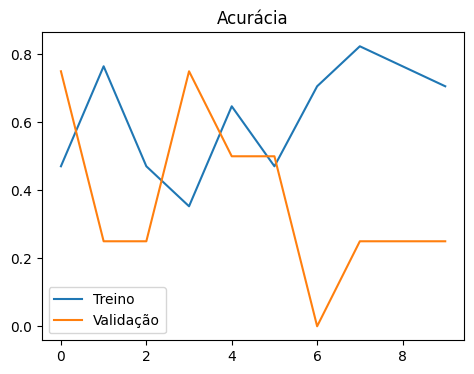

In [106]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Treino')
plt.plot(epochs_range, val_acc, label='Validação')
plt.title('Acurácia')
plt.legend()

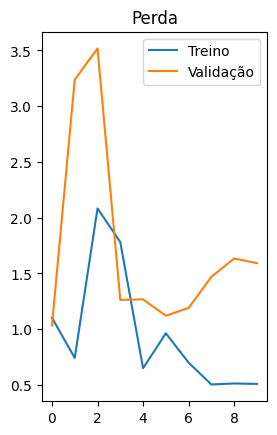

In [107]:
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Treino')
plt.plot(epochs_range, val_loss, label='Validação')
plt.title('Perda')
plt.legend()

In [108]:
plt.show()

In [109]:
# Salvar modelo .h5
model.save('meu_modelo_vegetais.h5')

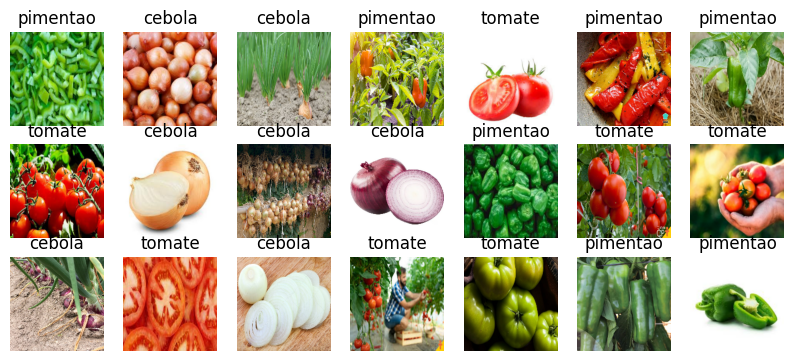

In [110]:
plt.figure(figsize=(10, 10))
for images, labels in dataset.take(1):
    for i in range(21):
        ax = plt.subplot(7, 7, i + 1)
        
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

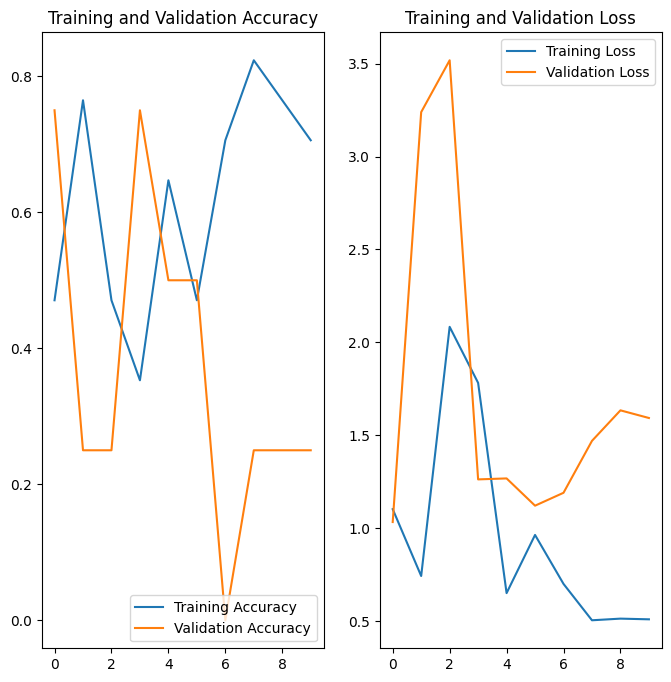

In [111]:
acc = history.history['accuracy'] 
val_acc = history.history['val_accuracy'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss'] 
epochs_range = range(epochs) 
plt.figure(figsize=(8, 8)) 
plt.subplot(1, 2, 1) 
plt.plot(epochs_range, acc, label='Training Accuracy') 
plt.plot(epochs_range, val_acc, label='Validation Accuracy') 
plt.legend(loc='lower right') 
plt.title('Training and Validation Accuracy') 
plt.subplot(1, 2, 2) 
plt.plot(epochs_range, loss, label='Training Loss') 
plt.plot(epochs_range, val_loss, label='Validation Loss') 
plt.legend(loc='upper right') 
plt.title('Training and Validation Loss') 
plt.show()